In [11]:
import numpy as np
import pandas as pd

features = list()

with open(r"D:\AI_ML_DL\ML\Machine Learning\Case studies\HumanActivityRecognition\HumanActivityRecognition\Data\features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]
    

In [13]:
len(features)

561

After performing some preprocessing steps we are able to map headers and lables and removed '_' and '()' from feature names

## Train data

In [14]:
train = pd.read_csv(r"D:\AI_ML_DL\ML\Machine Learning\Case studies\HumanActivityRecognition\HumanActivityRecognition\Data\csv_files\train.csv")

test = pd.read_csv(r"D:\AI_ML_DL\ML\Machine Learning\Case studies\HumanActivityRecognition\HumanActivityRecognition\Data\csv_files\test.csv")

In [15]:
train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
4195,0.283118,-0.013772,-0.096021,-0.991271,-0.966325,-0.968681,-0.992686,-0.965205,-0.969587,-0.931447,...,0.051136,-0.127839,-0.553074,0.091185,-0.610748,0.323702,0.165089,21,5,STANDING


### Data cleansing


Checking for Null values

In [20]:
print(f"Null values in train data is {train.isnull().values.sum()}")
print(f"Null values in test data is {test.isnull().values.sum()}")

Null values in train data is 0
Null values in test data is 0


Finding duplicates in train and test data

In [18]:
print(f"duplicates in train data is {sum(train.duplicated())}")
print(f"duplicates in test data is {sum(test.duplicated())}")

duplicates in train data is 0
duplicates in test data is 0


Check for any imbalace in data 

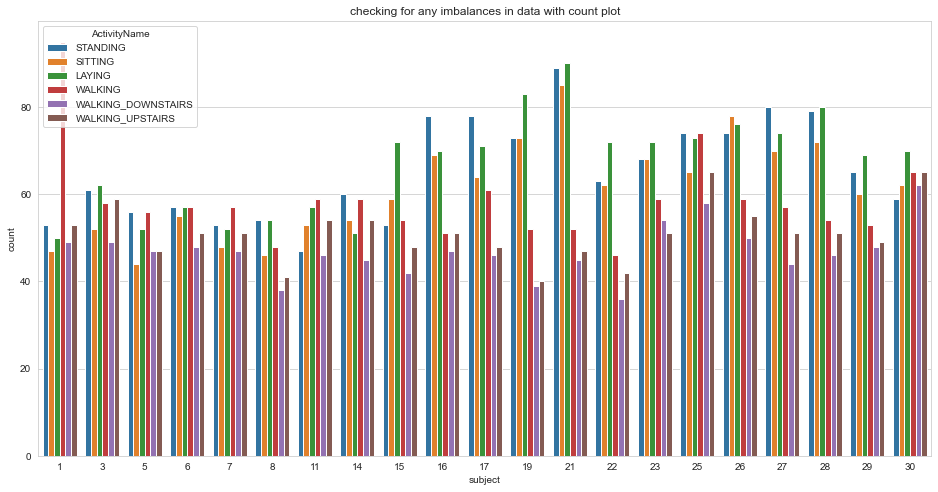

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
sns.countplot(x='subject', hue='ActivityName', data = train)
plt.title("checking for any imbalances in data with count plot")
plt.show()


there are not so many imbalances in data for consideration. Yes, but there are few but we can ignore.

C:\Users\91709\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


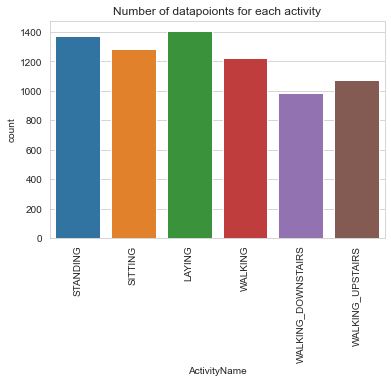

In [30]:
plt.title("Number of datapoionts for each activity")
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

Data is almost Balanced

Now try to coreleate static features like sitting,standing and laying with rest of dynamic featues.
For that lets try to seperate dataset for class label.

In [58]:
df1 = train[train.Activity == 1]
df2 = train[train.Activity == 2]
df3 = train[train.Activity == 3]
df4 = train[train.Activity == 4]
df5 = train[train.Activity == 5]
df6 = train[train.Activity == 6]

C:\Users\91709\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91709\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91709\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

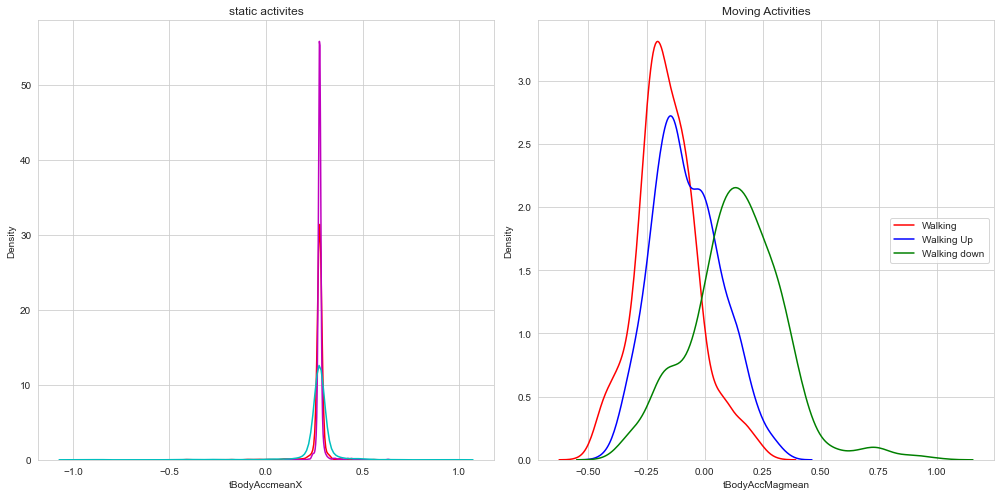

In [62]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title('static activites')
sns.distplot(df4['tBodyAccmeanX'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccmeanX'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccmeanX'],color = 'c',hist = False, label = 'Laying')


plt.subplot(1,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()


Static features are ranging between 0.2 to 0.4 where as dynamic features can range between  -0.5 to 1 

### Box plots

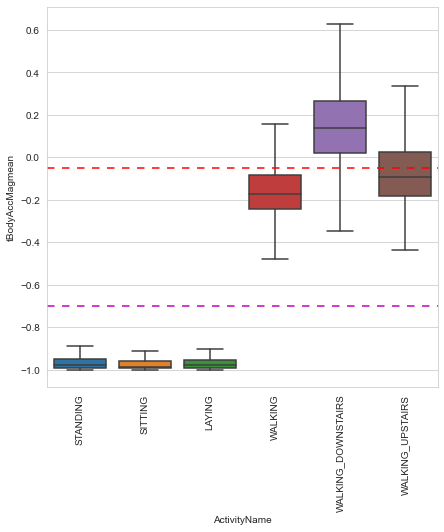

In [75]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName',y='tBodyAccMagmean',data=train,showfliers=False)
plt.xticks(rotation=90)
plt.axhline(y=-0.7, dashes=(5,5), c='m')
plt.axhline(y=-0.05, dashes=(5,5),c='r')
plt.show()

With above we can simply make rule based model like 
1. tBodyAccMagmean <= -0.7 can classified as any of standing, sitting, laying  and 
2. tBodyAccMagmean > -0.7 can be classified as dynamic movements

In [76]:
train.shape

(7352, 564)

As we have 560 plus features its not possible to visualize each and every feature. 
Instead we use TSNE for visualizing 560+ plus  dims into 2 dim.

### TSNE

tsne with 2 for 1000 iter at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 1.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 124.7747726, gradient norm = 0.0288084 (50 iterations in 2.547s)
[t-SNE] Iteration 100: error = 107.4124298, gradient norm = 0.0269256 (50 iterations in 1.158s)
[t-SNE] Iteration 150: err

C:\Users\91709\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


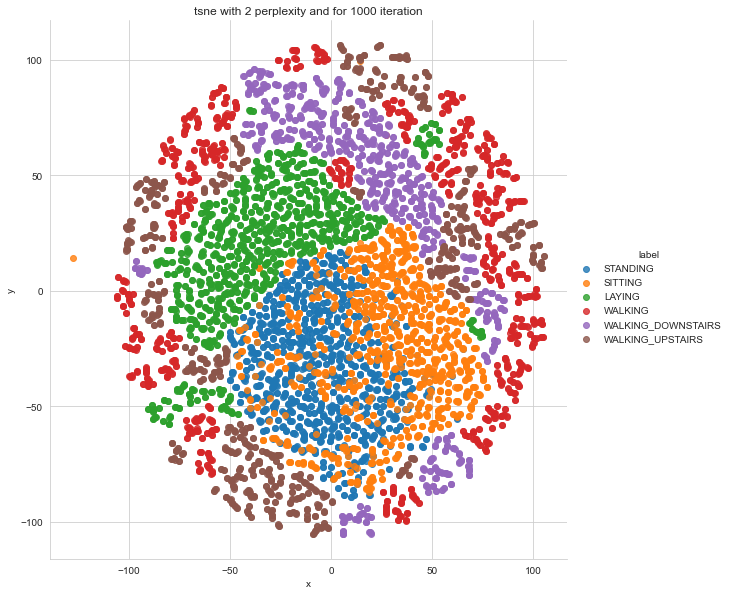

tsne with 5 for 1000 iter at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.197s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.039s
[t-SNE] Iteration 50: error = 114.1063156, gradient norm = 0.0189277 (50 iterations in 2.633s)
[t-SNE] Iteration 100: error = 97.2827988, gradient norm = 0.0149343 (50 iterations in 0.962s)
[t-SNE] Iteration 150: err

C:\Users\91709\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


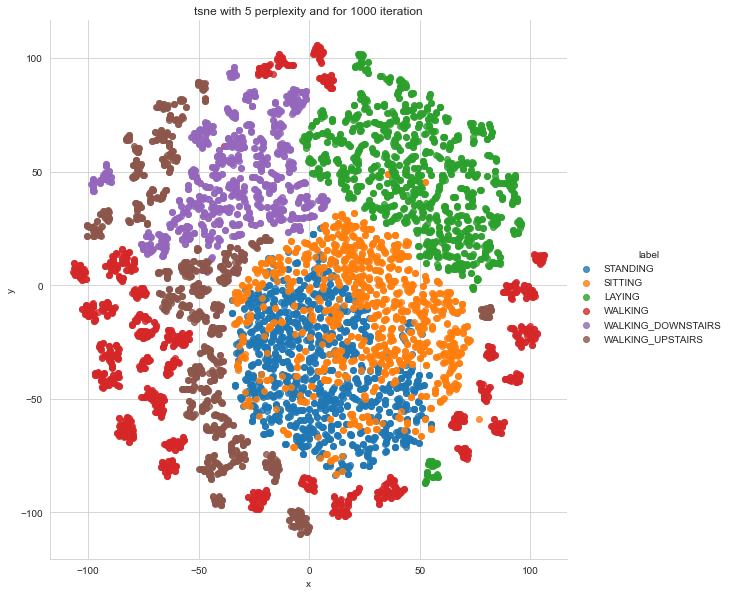

tsne with 10 for 1000 iter at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.072s
[t-SNE] Iteration 50: error = 105.9191437, gradient norm = 0.0180945 (50 iterations in 1.341s)
[t-SNE] Iteration 100: error = 90.6826630, gradient norm = 0.0095863 (50 iterations in 1.050s)
[t-SNE] Iteration 150: er

C:\Users\91709\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


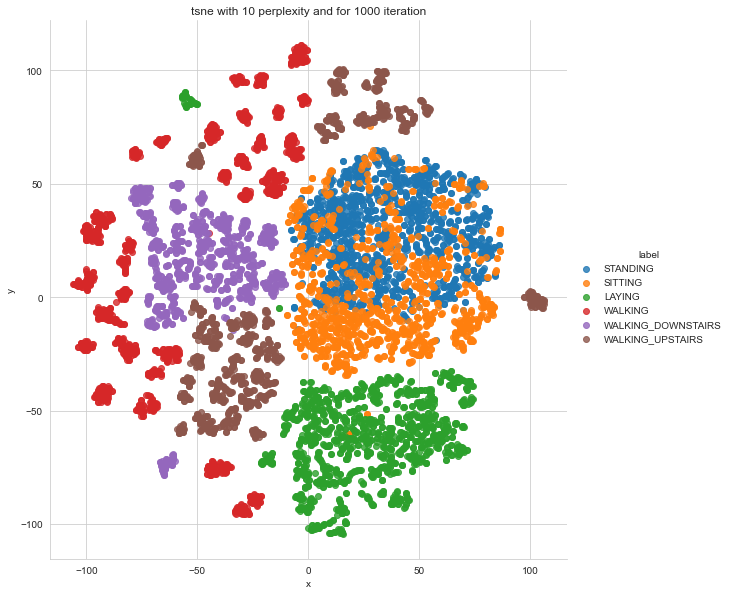

tsne with 15 for 1000 iter at max
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.218608
[t-SNE] Computed conditional probabilities in 0.108s
[t-SNE] Iteration 50: error = 101.2642212, gradient norm = 0.0152891 (50 iterations in 1.249s)
[t-SNE] Iteration 100: error = 86.4844360, gradient norm = 0.0092495 (50 iterations in 1.076s)
[t-SNE] Iteration 150: er

C:\Users\91709\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


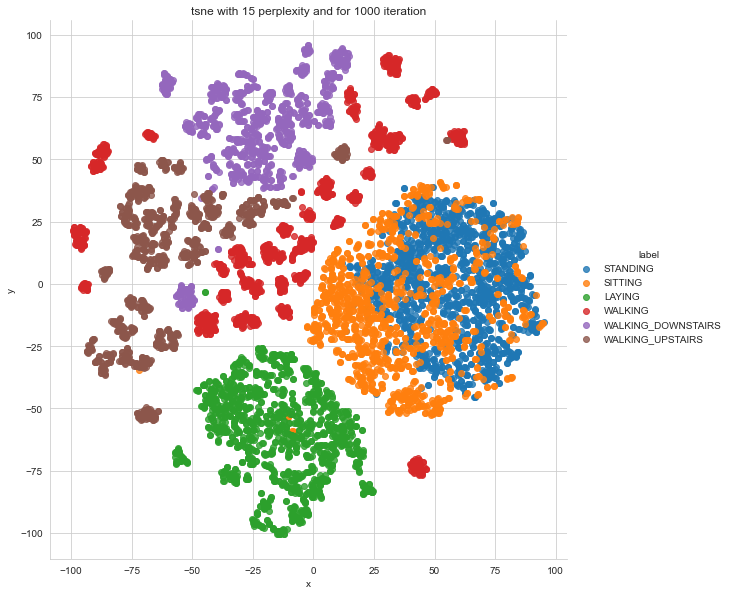

tsne with 20 for 1000 iter at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.141s
[t-SNE] Iteration 50: error = 97.2597504, gradient norm = 0.0209516 (50 iterations in 1.301s)
[t-SNE] Iteration 100: error = 83.9837189, gradient norm = 0.0067260 (50 iterations in 1.110s)
[t-SNE] Iteration 150: err

C:\Users\91709\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


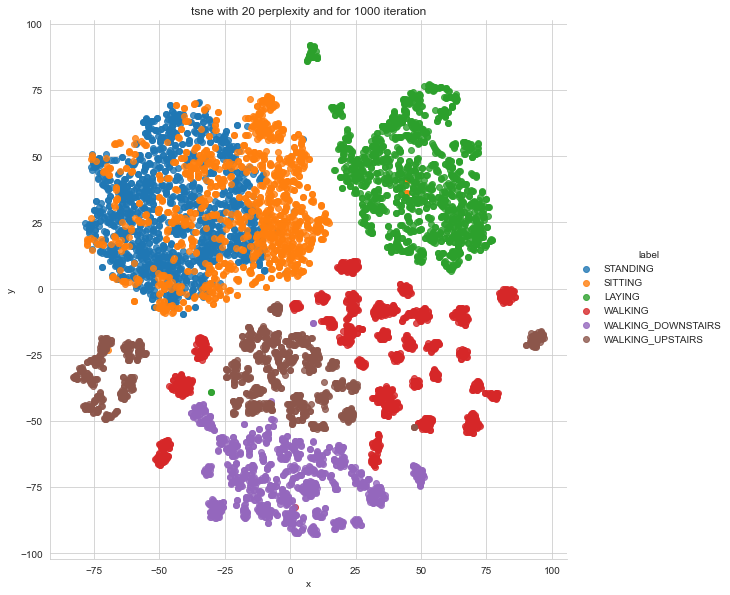

In [83]:
from sklearn.manifold import TSNE

#function for creating TSNE

def perform_tsne(x_data, y_data, perplexities, iter =1000, img_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        print(f"tsne with {perplexity} for 1000 iter at max")
        x_reduced = TSNE(perplexity = perplexity, verbose = 2).fit_transform(x_data)
        print("creating plot for t-sne for each perplexity")
        print(x_reduced)
        
        df = pd.DataFrame({'x':x_reduced[:,0],'y':x_reduced[:,1],'label':y_data})
        print(df)
        sns.lmplot(data=df, x='x', y='y', hue='label',fit_reg=False, size=8)
        plt.title(f"tsne with {perplexity} perplexity and for 1000 iteration")
        plt.show()
        

x_data = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_data = train.ActivityName
perform_tsne(x_data, y_data, perplexities = [2,5,10,15,20])

Irrespective of the perplexity, it is observed that there is a confusion betweeen sitting and standing.
We can expect subtle confusion while predicting sitting and standing